In [94]:
import pandas as pd
from scipy.cluster.vq import kmeans,vq,whiten
from sklearn.svm import SVR
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import time
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib.pyplot as ax5

In [95]:
start_time = time.time()

In [96]:
dataset = pd.read_csv('hidrat_data.csv')

In [97]:
dataset.head()

,Unnamed: 0,TIME,Temprature,Presure,oil,gas
0,0,10,4.4,1398.366,0,0
1,1,100,4.1,1384.328,0,0
2,2,200,4.2,1389.033,0,0
3,3,300,4.1,1383.081,0,0
4,4,400,3.8,1379.342,0,0


In [98]:
dataset.shape

(13062, 6)

In [99]:
X = dataset.iloc[:,[1,2,4,5]].values
Y = dataset.iloc[:,[3]].values

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

In [101]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1234)

In [102]:
X_train.shape

(9404, 4)

In [103]:
X_train

array([[6.78020e+04, 1.70000e+00, 9.00000e+00, 0.00000e+00],
       [9.18410e+04, 2.50000e+00, 5.00000e+00, 0.00000e+00],
       [8.32130e+04, 2.70000e+00, 1.10000e+01, 0.00000e+00],
       ...,
       [2.08150e+04, 1.70000e+00, 3.00000e+00, 0.00000e+00],
       [6.34250e+04, 1.90000e+00, 1.00000e+00, 0.00000e+00],
       [1.46648e+05, 1.80000e+00, 4.00000e+00, 0.00000e+00]])

In [104]:
r= np.ptp(X_train,axis=0)
r

array([2.5459e+05, 2.6000e+01, 2.1000e+01, 1.0000e+00])

In [105]:
y_train

array([[1044.443],
       [1222.856],
       [1256.182],
       ...,
       [1254.447],
       [1209.218],
       [1217.205]])

In [106]:
r= np.ptp(y_train,axis=0)
r

array([1414.942])

In [107]:
X_test.shape

(2613, 4)

In [108]:
X_test

array([[9.40330e+04, 1.80000e+00, 4.00000e+00, 0.00000e+00],
       [8.28130e+04, 1.90000e+00, 1.30000e+01, 0.00000e+00],
       [5.58070e+04, 2.30000e+00, 5.00000e+00, 0.00000e+00],
       ...,
       [2.86080e+04, 1.90000e+00, 1.40000e+01, 0.00000e+00],
       [1.31845e+05, 1.80000e+00, 1.00000e+01, 0.00000e+00],
       [7.74110e+04, 1.70000e+00, 4.00000e+00, 0.00000e+00]])

In [109]:
X_val.shape

(1045, 4)

In [110]:
X_val

array([[1.44430e+05, 2.60000e+00, 1.10000e+01, 0.00000e+00],
       [6.34090e+04, 1.90000e+00, 1.30000e+01, 0.00000e+00],
       [9.92170e+04, 2.60000e+00, 1.10000e+01, 0.00000e+00],
       ...,
       [5.26180e+04, 2.30000e+00, 0.00000e+00, 0.00000e+00],
       [1.14010e+04, 4.00000e+00, 7.00000e+00, 0.00000e+00],
       [1.04234e+05, 2.40000e+00, 1.30000e+01, 0.00000e+00]])

In [111]:
regressor = SVR(kernel='rbf')

In [112]:
st_x = StandardScaler()
X_train=st_x.fit_transform(X_train)
st_y = StandardScaler()
y_train=st_y.fit_transform(y_train)

In [113]:
X_test=st_x.fit_transform(X_test)
y_test=st_y.fit_transform(y_test)

In [114]:
X_train

array([[-0.31864292, -0.59882114,  0.1710623 , -0.22234308],
       [ 0.06333269,  0.20436146, -0.55766697, -0.22234308],
       [-0.07376476,  0.40515711,  0.53542694, -0.22234308],
       ...,
       [-1.06525833, -0.59882114, -0.92203161, -0.22234308],
       [-0.3881927 , -0.39802549, -1.28639625, -0.22234308],
       [ 0.93420656, -0.49842331, -0.73984929, -0.22234308]])

In [115]:
r= np.ptp(X_train,axis=0)
r

array([ 4.04539164, 26.10343428,  3.82582869,  4.71989697])

In [116]:
y_train

array([[-0.56907838],
       [ 0.49632503],
       [ 0.69533314],
       ...,
       [ 0.68497248],
       [ 0.41488493],
       [ 0.46257976]])

In [117]:
r= np.ptp(y_train,axis=0)
r

array([8.44940689])

In [118]:
regressor.fit(X_train,y_train)

C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [119]:
regressor.predict(X_train)

array([-0.10436497,  0.0452546 ,  0.21495912, ...,  0.82392329,
        0.53551987, -0.2327391 ])

C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


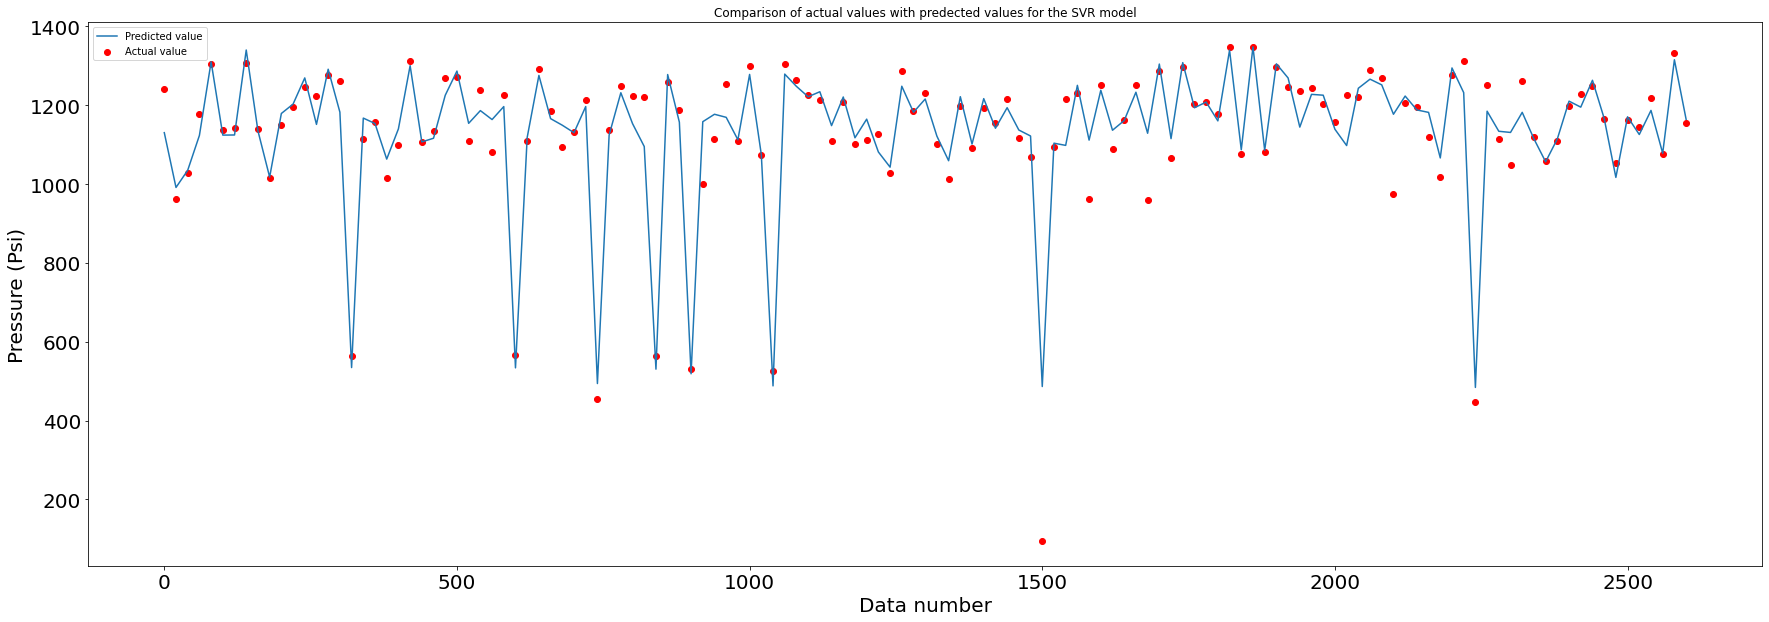

In [120]:
test_num = []
for i in range(len(y_test)):
    test_num.append(i)
test_num = test_num[::20]
model_predict = regressor.predict(X_test)
model_predict = st_y.inverse_transform(model_predict)
y_test2 = st_y.inverse_transform(y_test)
model_predict2=model_predict[::20]
y_test_each20 = y_test2[::20]
fig = plt.figure(figsize=(30, 10))
ax2 = fig.add_subplot(111)
ax2.plot(test_num,model_predict2, label='Predicted value')
ax2.scatter(test_num,y_test_each20 , label = 'Actual value',color= 'red')
ax2.set_title('Comparison of actual values with predected values for the SVR model')
ax2.set_xlabel('Data number', size=20)
ax2.set_ylabel('Pressure (Psi)',size= 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
ax2.legend()
fig.show()

No handles with labels found to put in legend.


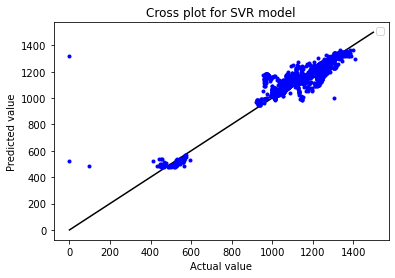

In [121]:
cross = []
i = 0
while i!=1500:
    cross.append(i)
    i = i+1
ax5.plot(cross,cross, color='black')
ax5.plot(y_test2,model_predict,'bo', markersize=3, color='blue')
# ax5.plot(y_train,model_predict_train,'bo', markersize=3,label='Train Data', color='red',marker = '<')
ax5.title('Cross plot for SVR model')
ax5.xlabel('Actual value')
ax5.ylabel('Predicted value')
ax5.legend()
ax5.show()

In [122]:
r2_score(y_train, regressor.predict(X_train))

0.9006620779217919

In [123]:
sqrt(mean_squared_error(y_train, regressor.predict(X_train)))

0.31517919042698256

In [124]:
r2_score(y_test, regressor.predict(X_test))

0.8762245468555013

In [125]:
sqrt(mean_squared_error(y_test, regressor.predict(X_test)))

0.3518173576509531

In [126]:
time.time() - start_time

26.882051467895508